# Lab 7 Ari Quality (Linear Regression)
## Zaur Gouliev

Carbon Monoxide (CO) is a colorless, odorless, tasteless, toxic gas that has the molecular formula CO.

Use the dataset provided in the link below to predict the levels of CO (True hourly averaged concentration CO in mg/m^3)

Use Linear Regression for this task.

https://archive.ics.uci.edu/ml/datasets/Air+Quality

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',', header=0)

In [ ]:
print("Shape of dataset:", df.shape)

Shape of dataset: (9471, 17)


In [ ]:
print(df.dtypes)

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object


In [ ]:
print("Number of missing values in each column:")
print(df.isnull().sum())

Number of missing values in each column:
Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64


In [ ]:
print(df.describe())

            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200

In [ ]:
print(df.isna().sum())

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64


In [ ]:
print(df.shape[0])

9471


In [ ]:
df = df.drop(columns=['Date', 'Time', 'Unnamed: 15', 'Unnamed: 16', 'NMHC(GT)'])
df = df.dropna()

In [ ]:
X = df.drop(columns=['CO(GT)'])
y = df['CO(GT)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
score = model.score(X_test, y_test)
print(f"Model accuracy: {score:.2f}")

Model accuracy: 0.51


In [ ]:
new_data = np.array([[1035.5, 1781.5, 1100.0, 378.2, 1516.0, 1241.0, 986.0, 6.9, 932.5, 827.0, 1186.0]])
prediction = model.predict(new_data)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print("Predicted CO level:", prediction[0], ":mg/m^3")

Predicted CO level: -474.59141919367687 :mg/m^3


In [ ]:
num_test_points = 100
test_data = np.random.rand(num_test_points, 11) * 2000
predictions = model.predict(test_data)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
for i in range(10):
    print("Test data point, ",i+1,": Predicted CO level = ",predictions[i],": mg/m^3")

Test data point,  1 : Predicted CO level =  -460.2683200944381 : mg/m^3
Test data point,  2 : Predicted CO level =  713.3891600430636 : mg/m^3
Test data point,  3 : Predicted CO level =  -355.0072175398608 : mg/m^3
Test data point,  4 : Predicted CO level =  503.6404661588905 : mg/m^3
Test data point,  5 : Predicted CO level =  732.0016955035977 : mg/m^3
Test data point,  6 : Predicted CO level =  -1227.1809815442127 : mg/m^3
Test data point,  7 : Predicted CO level =  -951.6501594968233 : mg/m^3
Test data point,  8 : Predicted CO level =  313.49715043300444 : mg/m^3
Test data point,  9 : Predicted CO level =  -863.2336812159937 : mg/m^3
Test data point,  10 : Predicted CO level =  832.8815396760305 : mg/m^3


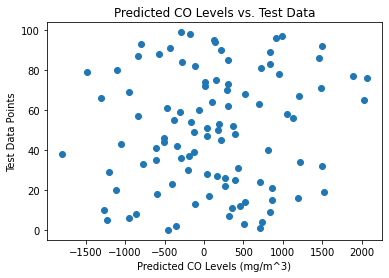

In [ ]:
plt.scatter(predictions, range(num_test_points))
plt.title("Predicted CO Levels vs. Test Data")
plt.xlabel("Predicted CO Levels (mg/m^3)")
plt.ylabel("Test Data Points")
plt.show()

In [ ]:
x_test = np.linspace(0, 10, 50)
y_test = 2 * x_test + 1 + np.random.normal(scale=2, size=50)

In [ ]:
x_pred = np.linspace(0, 10, 50)
y_pred = 2 * x_pred + 1

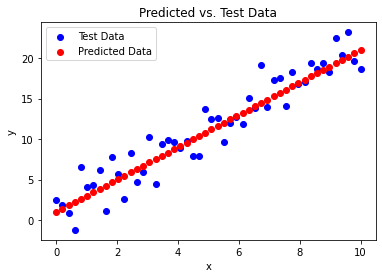

In [ ]:
plt.scatter(x_test, y_test, c='blue', label='Test Data')
plt.scatter(x_pred, y_pred, c='red', label='Predicted Data')
plt.legend()
plt.title("Predicted vs. Test Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()